In [1]:
#import the needed library
import pandas as pd

In [2]:
#import the csv files of the four years
ds_2016= pd.read_csv('/content/drive/MyDrive/archive (2)/2016cleaned.csv')
ds_2017 = pd.read_csv('/content/drive/MyDrive/archive (2)/2017cleaned.csv')
ds_2018 = pd.read_csv('/content/drive/MyDrive/archive (2)/2018cleaned.csv')
ds_2019 = pd.read_csv('/content/drive/MyDrive/archive (2)/2019cleaned.csv')
ds_2020 = pd.read_csv('/content/drive/MyDrive/archive (2)/2020cleaned.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#check the features in the data
ds_2016.columns

Index(['Unnamed: 0', 'Facility ID', 'Facility Name', 'Address', 'City',
       'State', 'ZIP Code', 'Phone Number', 'HCAHPS Measure ID',
       'HCAHPS Question', 'HCAHPS Answer Description',
       'Patient Survey Star Rating', 'HCAHPS Answer Percent',
       'HCAHPS Linear Mean Value', 'Number of Completed Surveys',
       'Survey Response Rate Percent', 'Start Date', 'End Date', 'Year',
       'Hospital Type', 'Hospital Ownership', 'Emergency Services',
       'Meets criteria for promoting interoperability of EHRs',
       'Hospital overall rating', 'Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'],
      dtype='object')

To answer the first question about the hospital with the overall performance through the years, I qualified my ranking with the hospital overall rating as expected at first but then i realized that there are lots of hospitals with a 5-star rating, hence the hospital overall rating will not be an enough criteria to pick my Top 10.


So I added more features of the table , that can justify my ranking of the hospital in terms of overall performance(not overall rating). The features added are; *Hospital overall rating, Patient survey star rating, patient experience national comparison , Timeliness of care national comparison, Safety of care national comparison,Effectiveness of care national comparison, Effiient use of medical imaging national comparison*. 
    These features have been carefully screened and resulted into less bias in justifying the hospital ranking.

In [4]:
#converting the features into numerical values for the purpose of ranking
#this is done as test-run for year 2016 first
ds_2016['Hospital overall rating'].value_counts()
ds_2016['Hospital overall rating'].replace('Not Available', 0, inplace=True)
ds_2016['Hospital overall rating'].replace('1', 1, inplace=True)
ds_2016['Hospital overall rating'].replace('2', 2, inplace=True)
ds_2016['Hospital overall rating'].replace('3', 3, inplace=True)
ds_2016['Hospital overall rating'].replace('4', 4, inplace=True)
ds_2016['Hospital overall rating'].replace('5', 5, inplace=True)

ds_2016['Patient experience national comparison'].value_counts()
ds_2016['Patient experience national comparison'].replace('Not Available', 0, inplace=True)
ds_2016['Patient experience national comparison'].replace('Above the National average', 3, inplace=True)
ds_2016['Patient experience national comparison'].replace('Same as the National average', 2, inplace=True)
ds_2016['Patient experience national comparison'].replace('Below the National average', 1, inplace=True)



ds_2016['Timeliness of care national comparison'].value_counts()
ds_2016['Timeliness of care national comparison'].replace('Not Available', 0, inplace=True)
ds_2016['Timeliness of care national comparison'].replace('Above the National average', 3, inplace=True)
ds_2016['Timeliness of care national comparison'].replace('Same as the National average', 2, inplace=True)
ds_2016['Timeliness of care national comparison'].replace('Below the National average', 1, inplace=True)


ds_2016['Safety of care national comparison'].value_counts()
ds_2016['Safety of care national comparison'].replace('Not Available', 0, inplace=True)
ds_2016['Safety of care national comparison'].replace('Above the National average', 3, inplace=True)
ds_2016['Safety of care national comparison'].replace('Same as the National average', 2, inplace=True)
ds_2016['Safety of care national comparison'].replace('Below the National average', 1, inplace=True)


ds_2016['Effectiveness of care national comparison'].value_counts()
ds_2016['Effectiveness of care national comparison'].replace('Not Available', 0, inplace=True)
ds_2016['Effectiveness of care national comparison'].replace('Above the National average', 3, inplace=True)
ds_2016['Effectiveness of care national comparison'].replace('Same as the National average', 2, inplace=True)
ds_2016['Effectiveness of care national comparison'].replace('Below the National average', 1, inplace=True)


ds_2016['Efficient use of medical imaging national comparison'].value_counts()
ds_2016['Efficient use of medical imaging national comparison'].replace('Not Available', 0, inplace=True)
ds_2016['Efficient use of medical imaging national comparison'].replace('Above the National average', 3, inplace=True)
ds_2016['Efficient use of medical imaging national comparison'].replace('Same as the National average', 2, inplace=True)
ds_2016['Efficient use of medical imaging national comparison'].replace('Below the National average', 1, inplace=True)

ds_2016['Patient Survey Star Rating'].value_counts()
ds_2016['Patient Survey Star Rating'].replace('Not Available', 0, inplace=True)
ds_2016['Patient Survey Star Rating'].replace('Not Applicable', 0, inplace=True)
ds_2016['Patient Survey Star Rating'].replace('1', 1, inplace=True)
ds_2016['Patient Survey Star Rating'].replace('2', 2, inplace=True)
ds_2016['Patient Survey Star Rating'].replace('3', 3, inplace=True)
ds_2016['Patient Survey Star Rating'].replace('4', 4, inplace=True)
ds_2016['Patient Survey Star Rating'].replace('5', 5, inplace=True)


#convert all abbreviations in the state column to full meaning
states = {'AK': 'Alaska','AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona','CA': 'California', 'CO': 'Colorado',
        'CT': 'Connecticut', 'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam','HI': 'Hawaii', 
        'IA': 'Iowa','ID': 'Idaho', 'IL': 'Illinois','IN': 'Indiana', 'KS': 'Kansas','KY': 'Kentucky', 'LA': 'Louisiana',
        'MA': 'Massachusetts', 'MD': 'Maryland','ME': 'Maine', 'MI': 'Michigan','MN': 'Minnesota', 'MO': 'Missouri','MP': 'Northern Mariana Islands',
        'MS': 'Mississippi','MT': 'Montana','NA': 'National', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire','NJ': 'New Jersey', 'NM': 'New Mexico',
        'NV': 'Nevada',  'NY': 'New York','OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',  'PA': 'Pennsylvania','PR': 'Puerto Rico',
        'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota',  'TN': 'Tennessee','TX': 'Texas',
        'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands','VT': 'Vermont', 'WA': 'Washington','WI': 'Wisconsin',
        'WV': 'West Virginia','WY': 'Wyoming'}
ds_2016['State']=ds_2016['State'].map(lambda x: states.get(x,x))

#convert the patient survey star rating and overall rating to numeric values for the years 
ds_2016['Patient Survey Star Rating']= pd.to_numeric(ds_2016['Patient Survey Star Rating'])
ds_2016['Hospital overall rating']= pd.to_numeric(ds_2016['Hospital overall rating'])


In [5]:
#after successfull run of the code above, same was repeated for the remaining years
year_list =[ds_2017, ds_2018, ds_2019, ds_2020]
for year in year_list:
  year['Hospital overall rating'].value_counts()
  year['Hospital overall rating'].replace('Not Available', 0, inplace=True)
  year['Hospital overall rating'].replace('1', 1, inplace=True)
  year['Hospital overall rating'].replace('2', 2, inplace=True)
  year['Hospital overall rating'].replace('3', 3, inplace=True)
  year['Hospital overall rating'].replace('4', 4, inplace=True)
  year['Hospital overall rating'].replace('5', 5, inplace=True)


  year['Patient experience national comparison'].value_counts()
  year['Patient experience national comparison'].replace('Not Available', 0, inplace=True)
  year['Patient experience national comparison'].replace('Above the national average', 3, inplace=True)
  year['Patient experience national comparison'].replace('Same as the national average', 2, inplace=True)
  year['Patient experience national comparison'].replace('Below the national average', 1, inplace=True)

  

  year['Timeliness of care national comparison'].value_counts()
  year['Timeliness of care national comparison'].replace('Not Available', 0, inplace=True)
  year['Timeliness of care national comparison'].replace('Above the national average', 3, inplace=True)
  year['Timeliness of care national comparison'].replace('Same as the national average', 2, inplace=True)
  year['Timeliness of care national comparison'].replace('Below the national average', 1, inplace=True)


  year['Safety of care national comparison'].value_counts()
  year['Safety of care national comparison'].replace('Not Available', 0, inplace=True)
  year['Safety of care national comparison'].replace('Above the national average', 3, inplace=True)
  year['Safety of care national comparison'].replace('Same as the national average', 2, inplace=True)
  year['Safety of care national comparison'].replace('Below the national average', 1, inplace=True)


  year['Effectiveness of care national comparison'].value_counts()
  year['Effectiveness of care national comparison'].replace('Not Available', 0, inplace=True)
  year['Effectiveness of care national comparison'].replace('Above the national average', 3, inplace=True)
  year['Effectiveness of care national comparison'].replace('Same as the national average', 2, inplace=True)
  year['Effectiveness of care national comparison'].replace('Below the national average', 1, inplace=True)


  year['Efficient use of medical imaging national comparison'].value_counts()
  year['Efficient use of medical imaging national comparison'].replace('Not Available', 0, inplace=True)
  year['Efficient use of medical imaging national comparison'].replace('Above the national average', 3, inplace=True)
  year['Efficient use of medical imaging national comparison'].replace('Same as the national average', 2, inplace=True)
  year['Efficient use of medical imaging national comparison'].replace('Below the national average', 1, inplace=True)

  year['Patient Survey Star Rating'].value_counts()
  year['Patient Survey Star Rating'].replace('Not Available', 0, inplace=True)
  year['Patient Survey Star Rating'].replace('Not Applicable', 0, inplace=True)
  year['Patient Survey Star Rating'].replace('1', 1, inplace=True)
  year['Patient Survey Star Rating'].replace('2', 2, inplace=True)
  year['Patient Survey Star Rating'].replace('3', 3, inplace=True)
  year['Patient Survey Star Rating'].replace('4', 4, inplace=True)
  year['Patient Survey Star Rating'].replace('5', 5, inplace=True)
#convert all abbreviations in state to full meaning
  year['State']=year['State'].map(lambda x: states.get(x,x))
 #convert the patient survey star rating and overall rating to numeric values for the years 
  year['Patient Survey Star Rating']= pd.to_numeric(year['Patient Survey Star Rating'])
  year['Hospital overall rating']= pd.to_numeric(year['Hospital overall rating'])


Now that the data has been well prepared for ranking. Next is the ranking 

A

TO START THE RANKING, WE FOUND THE OVERALL PERFORMANCE OF EACH HOSPITALS FOR EACH YEAR.

In [6]:
#extract the Facility name(Hospitals) and the criteria for ranking from the dataset in year 2016.
rating_features_hospital = ds_2016[['Facility Name', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]
#Group the rating_features_hospital by Hospitals, getting the average score from each criteria per hospitals
avg_rating_per_hospital = rating_features_hospital.groupby('Facility Name').mean()

#create a new column for the total performance of each hospitals
avg_rating_per_hospital['2016 Total performance score']=avg_rating_per_hospital.sum(axis=1).round(1)
avg_rating_per_hospital.reset_index(inplace=True)

performance_2016 =avg_rating_per_hospital
performance_2016

,Facility Name,Hospital overall rating,Patient Survey Star Rating,Effectiveness of care national comparison,Safety of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Patient experience national comparison,2016 Total performance score
0,ABBEVILLE AREA MEDICAL CENTER,4.0,1.036364,2.0,0.0,3.0,2.0,3.0,15.0
1,ABBEVILLE GENERAL HOSPITAL,3.0,0.727273,2.0,2.0,2.0,0.0,2.0,11.7
2,ABBOTT NORTHWESTERN HOSPITAL,4.0,0.854545,2.0,1.0,2.0,2.0,3.0,14.9
3,ABILENE REGIONAL MEDICAL CENTER,3.0,0.563636,2.0,3.0,2.0,2.0,1.0,13.6
4,ABINGTON MEMORIAL HOSPITAL,2.0,0.600000,2.0,1.0,1.0,3.0,2.0,11.6
...,...,...,...,...,...,...,...,...,...
4603,YORK HOSPITAL,3.5,0.745455,2.0,3.0,2.5,2.0,2.0,15.7
4604,YUKON KUSKOKWIM DELTA REG HOSPITAL,3.0,0.454545,0.0,0.0,0.0,0.0,1.0,4.5
4605,YUMA DISTRICT HOSPITAL,3.0,0.000000,2.0,0.0,3.0,0.0,0.0,8.0
4606,YUMA REGIONAL MEDICAL CENTER,2.0,0.472727,2.0,3.0,1.0,1.0,1.0,10.5


In [7]:
#The above code is repeated for year 2017 here
rating_features_hospital1 = ds_2017[['Facility Name', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_hospital1 = rating_features_hospital1.groupby('Facility Name').mean()
avg_rating_per_hospital1['2017 Total performance score']=avg_rating_per_hospital1.sum(axis=1).round(1)
avg_rating_per_hospital1.reset_index(inplace=True)
#output the facility name and the total performance score,as that is what is needed for ranking
performance_2017 =avg_rating_per_hospital1[['Facility Name', '2017 Total performance score']]
performance_2017

,Facility Name,2017 Total performance score
0,ABBEVILLE AREA MEDICAL CENTER,14.0
1,ABBEVILLE GENERAL HOSPITAL,11.8
2,ABBOTT NORTHWESTERN HOSPITAL,14.7
3,ABILENE REGIONAL MEDICAL CENTER,13.6
4,ABINGTON MEMORIAL HOSPITAL,11.7
...,...,...
4619,YORK HOSPITAL,15.7
4620,YUKON KUSKOKWIM DELTA REG HOSPITAL,4.5
4621,YUMA DISTRICT HOSPITAL,8.0
4622,YUMA REGIONAL MEDICAL CENTER,10.5


In [8]:
#same thing repeated for year 2018
rating_features_hospital2 = ds_2018[['Facility Name', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_hospital2 = rating_features_hospital2.groupby('Facility Name').mean()
avg_rating_per_hospital2['2018 Total performance score']=avg_rating_per_hospital2.sum(axis=1).round(1)
avg_rating_per_hospital2.reset_index(inplace=True)
performance_2018 =avg_rating_per_hospital2[['Facility Name', '2018 Total performance score']]
performance_2018

,Facility Name,2018 Total performance score
0,ABBEVILLE AREA MEDICAL CENTER,10.0
1,ABBEVILLE GENERAL HOSPITAL,11.7
2,ABBOTT NORTHWESTERN HOSPITAL,14.8
3,ABILENE REGIONAL MEDICAL CENTER,12.6
4,ABINGTON MEMORIAL HOSPITAL,12.6
...,...,...
4603,YUKON KUSKOKWIM DELTA REG HOSPITAL,6.5
4604,YUMA DISTRICT HOSPITAL,8.0
4605,YUMA REGIONAL MEDICAL CENTER,10.5
4606,ZUCKERBERG SAN FRANCISCO GENERAL HOSP & TRAUMA...,7.6


In [9]:
#still using the same concept for year 2019
rating_features_hospital3 = ds_2019[['Facility Name', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_hospital3 = rating_features_hospital3.groupby('Facility Name').mean()
avg_rating_per_hospital3['2019 Total performance score']=avg_rating_per_hospital3.sum(axis=1).round(1)
avg_rating_per_hospital3.reset_index(inplace=True)
performance_2019 =avg_rating_per_hospital3[['Facility Name', '2019 Total performance score']]
performance_2019

,Facility Name,2019 Total performance score
0,ABBEVILLE AREA MEDICAL CENTER,14.0
1,ABBEVILLE GENERAL HOSPITAL,15.4
2,ABBOTT NORTHWESTERN HOSPITAL,15.4
3,ABILENE REGIONAL MEDICAL CENTER,11.4
4,ABINGTON MEMORIAL HOSPITAL,11.3
...,...,...
4581,YUKON KUSKOKWIM DELTA REG HOSPITAL,6.2
4582,YUMA DISTRICT HOSPITAL,9.0
4583,YUMA REGIONAL MEDICAL CENTER,11.3
4584,ZUCKERBERG SAN FRANCISCO GENERAL HOSP & TRAUMA...,8.4


In [10]:
#year 2020 hospital ranking
rating_features_hospital4 = ds_2020[['Facility Name', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_hospital4 = rating_features_hospital4.groupby('Facility Name').mean()
avg_rating_per_hospital4['2020 Total performance score']=avg_rating_per_hospital4.sum(axis=1).round(1)
avg_rating_per_hospital4.reset_index(inplace=True)
performance_2020 =avg_rating_per_hospital4[['Facility Name', '2020 Total performance score']]
performance_2020

,Facility Name,2020 Total performance score
0,1st Medical Group (Langley AFB),0.5
1,60th Medical Group (Travis AFB),0.4
2,673rd Medical Group (Joint Base Elmendorf-Rich...,0.5
3,81st Medical Group (Keesler AFB),0.6
4,88th Medical Group (Wright-Patterson AFB),0.6
...,...,...
4591,YUKON KUSKOKWIM DELTA REG HOSPITAL,6.3
4592,YUMA DISTRICT HOSPITAL,2.0
4593,YUMA REGIONAL MEDICAL CENTER,11.3
4594,ZUCKERBERG SAN FRANCISCO GENERAL HOSP & TRAUMA...,8.3


WE NOW HAVE THE TOTAL PERFORMANCE OF EACH HOSPITALS FOR EACH YEAR. WE MERGE THEM TOGETHER AND FIND THE HIGHEST 10 HOSPITALS WITH RESPECT TO THEIR OVERALL PERFORMANCE.

In [11]:
#merge all the performance table for each year
# an outer merge is being use.
merge_2016_2017=pd.merge(performance_2016[['Facility Name', '2016 Total performance score']], performance_2017, on='Facility Name', how ='outer')
merge_2016_2017_2018 = pd.merge(merge_2016_2017, performance_2018, on='Facility Name', how ='outer')
merge_2016_2017_2018_2019 =  pd.merge(merge_2016_2017_2018, performance_2019, on='Facility Name', how ='outer')
merge_2016_2017_2018_2019_2020 = pd.merge(merge_2016_2017_2018_2019, performance_2020, on = 'Facility Name', how ='outer')
merge_2016_2017_2018_2019_2020['Overall performance']=merge_2016_2017_2018_2019_2020.sum(axis=1)
Overall_performance_table =merge_2016_2017_2018_2019_2020
Overall_performance_table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,Facility Name,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
0,ABBEVILLE AREA MEDICAL CENTER,15.0,14.0,10.0,14.0,10.0,63.0
1,ABBEVILLE GENERAL HOSPITAL,11.7,11.8,11.7,15.4,14.5,65.1
2,ABBOTT NORTHWESTERN HOSPITAL,14.9,14.7,14.8,15.4,15.4,75.2
3,ABILENE REGIONAL MEDICAL CENTER,13.6,13.6,12.6,11.4,13.3,64.5
4,ABINGTON MEMORIAL HOSPITAL,11.6,11.7,12.6,11.3,13.3,60.5
...,...,...,...,...,...,...,...
5764,Walter Reed National Military Med Cen,NaN,NaN,NaN,NaN,0.5,0.5
5765,Weed ACH (FT Irwin),NaN,NaN,NaN,NaN,0.5,0.5
5766,William Beaumont AMG (FT Bliss),NaN,NaN,NaN,NaN,0.4,0.4
5767,Winn ACH (FT Stewart),NaN,NaN,NaN,NaN,0.4,0.4


MERGING IS DONE, NOW WE RANK

In [12]:
# sort the overall performance in descending order to get the highest hospitals
ranked_performance_for_hospitals = Overall_performance_table.sort_values(by='Overall performance', ascending=False)
# we got the top 10 hospitals
top10_hospitals = ranked_performance_for_hospitals.head(10)
top10_hospitals

,Facility Name,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
3795,ST DAVID'S MEDICAL CENTER,19.8,19.9,19.8,20.4,19.4,99.3
1629,HOLLAND COMMUNITY HOSPITAL,18.9,18.9,19.9,19.5,18.5,95.7
2730,NORTH AUSTIN MEDICAL CENTER,18.9,18.8,18.7,19.4,18.4,94.2
3511,SCHNECK MEDICAL CENTER,18.9,18.9,18.9,18.5,18.5,93.7
3341,ROPER HOSPITAL,18.9,18.9,18.8,18.5,18.5,93.6
3526,SCOTTSDALE THOMPSON PEAK MEDICAL CENTER,17.8,17.8,19.7,19.4,18.4,93.1
2356,MEMORIAL HOSPITAL AND HEALTH CARE CENTER,18.0,18.0,19.9,18.5,18.5,92.9
256,BAPTIST MEMORIAL HOSPITAL UNION COUNTY,17.9,17.9,17.9,18.5,19.5,91.7
1279,FRANCISCAN HEALTH MOORESVILLE,17.8,17.8,18.9,18.5,18.5,91.5
775,CLEVELAND CLINIC,17.8,17.9,18.8,18.5,18.5,91.5


The top 10 hospitals are ;


1. ST DAVID'S MEDICAL CENTER
2. HOLLAND COMMUNITY HOSPITAL
3. SCHNECK MEDICAL CENTER
4. BAPTIST MEMORIAL HOSPITAL UNION COUNTY
5. MERCY HOSPITAL ST LOUIS
6. FRANCISCAN HEALTH MOORESVILLE
7. MEMORIAL HOSPITAL AND HEALTH CARE CENTER
8. ROSE MEDICAL CENTER 
0. MEDICAL CENTER OF THE ROCKIES
10. AURORA LAKELAND MEDICAL CENTER











In [13]:
# sort the overall performance in descending order to get the highest hospitals
ranked_performance_for_hospitals = Overall_performance_table.sort_values(by='Overall performance', ascending=True)
# we got the top 10 hospitals
least10_hospitals = ranked_performance_for_hospitals.head(10)
least10_hospitals

,Facility Name,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
1547,HEALTHSOURCE SAGINAW,0.0,0.0,0.0,0.0,0.0,0.0
1652,HOPI HEALTH CARE CENTER,0.0,0.0,0.0,0.0,0.0,0.0
5482,MARSHFIELD MEDICAL CENTER - EAU CLAIRE,NaN,NaN,NaN,NaN,0.0,0.0
686,CHILDREN'S HEALTHCARE OF ATLANTA AT EGLESTON,0.0,0.0,0.0,0.0,0.0,0.0
361,BENNETT COUNTY HOSPITAL AND NURSING HOME - CAH,0.0,0.0,0.0,0.0,0.0,0.0
1654,HORTON COMMUNITY HOSPITAL,0.0,0.0,0.0,NaN,NaN,0.0
687,CHILDREN'S HOME OF PITTSBURGH,0.0,0.0,0.0,0.0,0.0,0.0
688,CHILDREN'S HOSP OF LOS ANGELES,0.0,0.0,0.0,0.0,0.0,0.0
689,CHILDREN'S HOSP OF RICHMOND OF THE VCU HEALTH SYS,0.0,0.0,0.0,0.0,NaN,0.0
690,CHILDREN'S HOSPITAL,0.0,0.0,NaN,NaN,NaN,0.0


The Least 10 hospitals are ;
1. HEALTHSOURCE SAGINAW
2. HOPI HEALTH CARE CENTER
3. MARSHFIELD MEDICAL CENTER - EAU CLAIRE
4. CHILDREN'S HEALTHCARE OF ATLANTA AT EGLESTON	
5. BENNETT COUNTY HOSPITAL AND NURSING HOME - CAH
6. HORTON COMMUNITY HOSPITAL
7. CHILDREN'S HOME OF PITTSBURGH
8. CHILDREN'S HOSP OF LOS ANGELES
9. CHILDREN'S HOSP OF RICHMOND OF THE VCU HEALTH SYS
10. CHILDREN'S HOSPITAL	

B

STATE RANKING

The same concept used for the hospital ranking  is repeated for the state ranking too 

In [14]:
rating_features_state = ds_2016[['State', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_state = rating_features_state.groupby('State').mean()
avg_rating_per_state['2016 Total performance score']=avg_rating_per_state.sum(axis=1).round(1)
avg_rating_per_state.reset_index(inplace=True)
performance_2016S =avg_rating_per_state[['State', '2016 Total performance score']]
performance_2016S


,State,2016 Total performance score
0,Alabama,11.3
1,Alaska,4.4
2,American Samoa,0.0
3,Arizona,8.8
4,Arkansas,9.3
5,California,9.7
6,Colorado,9.7
7,Connecticut,11.1
8,Delaware,12.3
9,District of Columbia,8.0


In [15]:
rating_features_state1 = ds_2017[['State', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_state1 = rating_features_state1.groupby('State').mean()
avg_rating_per_state1['2017 Total performance score']=avg_rating_per_state1.sum(axis=1).round(1)
avg_rating_per_state1.reset_index(inplace=True)
performance_2017S =avg_rating_per_state1[['State', '2017 Total performance score']]

performance_2017S

,State,2017 Total performance score
0,Alabama,11.0
1,Alaska,4.5
2,American Samoa,0.0
3,Arizona,8.8
4,Arkansas,9.2
5,California,9.6
6,Colorado,9.6
7,Connecticut,11.1
8,Delaware,12.3
9,District of Columbia,8.0


In [16]:
rating_features_state2 = ds_2018[['State', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_state2 = rating_features_state2.groupby('State').mean()
avg_rating_per_state2['2018 Total performance score']=avg_rating_per_state2.sum(axis=1).round(1)
avg_rating_per_state2.reset_index(inplace=True)
performance_2018S =avg_rating_per_state2[['State', '2018 Total performance score']]
performance_2018S

,State,2018 Total performance score
0,Alabama,10.9
1,Alaska,5.3
2,American Samoa,0.0
3,Arizona,9.3
4,Arkansas,8.9
5,California,9.9
6,Colorado,9.7
7,Connecticut,11.0
8,Delaware,12.2
9,District of Columbia,8.1


In [17]:
rating_features_state3 = ds_2019[['State', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_state3 = rating_features_state3.groupby('State').mean()
avg_rating_per_state3['2019 Total performance score']=avg_rating_per_state3.sum(axis=1).round(1)
avg_rating_per_state3.reset_index(inplace=True)
performance_2019S =avg_rating_per_state3[['State', '2019 Total performance score']]
performance_2019S

,State,2019 Total performance score
0,Alabama,10.7
1,Alaska,5.9
2,American Samoa,0.0
3,Arizona,8.7
4,Arkansas,9.6
5,California,9.8
6,Colorado,9.5
7,Connecticut,10.7
8,Delaware,10.2
9,District of Columbia,8.2


In [18]:
rating_features_state4 = ds_2020[['State', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_state4 = rating_features_state4.groupby('State').mean()
avg_rating_per_state4['2020 Total performance score']=avg_rating_per_state4.sum(axis=1).round(1)
avg_rating_per_state4.reset_index(inplace=True)
performance_2020S =avg_rating_per_state4[['State', '2020 Total performance score']]
performance_2020S

,State,2020 Total performance score
0,Alabama,10.4
1,Alaska,5.7
2,American Samoa,0.0
3,Arizona,8.9
4,Arkansas,9.2
5,California,9.7
6,Colorado,9.1
7,Connecticut,10.9
8,Delaware,9.6
9,District of Columbia,8.8


merge all the performance recorded by each state

In [19]:
Smerge_2016_2017=pd.merge(performance_2016S, performance_2017S, on='State', how ='outer')
Smerge_2016_2017_2018 = pd.merge(Smerge_2016_2017, performance_2018S, on='State', how ='outer')
Smerge_2016_2017_2018_2019 =  pd.merge(Smerge_2016_2017_2018, performance_2019S, on='State', how ='outer')
Smerge_2016_2017_2018_2019_2020 = pd.merge(Smerge_2016_2017_2018_2019, performance_2020S, on = 'State', how ='outer')
Smerge_2016_2017_2018_2019_2020['Overall performance']=Smerge_2016_2017_2018_2019_2020.sum(axis=1)
Overall_performance_tableS =Smerge_2016_2017_2018_2019_2020
Overall_performance_tableS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,State,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
0,Alabama,11.3,11.0,10.9,10.7,10.4,54.3
1,Alaska,4.4,4.5,5.3,5.9,5.7,25.8
2,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0
3,Arizona,8.8,8.8,9.3,8.7,8.9,44.5
4,Arkansas,9.3,9.2,8.9,9.6,9.2,46.2
5,California,9.7,9.6,9.9,9.8,9.7,48.7
6,Colorado,9.7,9.6,9.7,9.5,9.1,47.6
7,Connecticut,11.1,11.1,11.0,10.7,10.9,54.8
8,Delaware,12.3,12.3,12.2,10.2,9.6,56.6
9,District of Columbia,8.0,8.0,8.1,8.2,8.8,41.1


STATE WITH THE OVERALL MOST PERFORMING HOSPITALS

In [20]:
ranked_performance_for_state = Overall_performance_tableS.sort_values(by='Overall performance', ascending=False)
top10_state= ranked_performance_for_state.head(10)
top10_state

,State,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
43,Rhode Island,13.5,13.5,13.4,12.6,12.6,65.6
16,Indiana,12.7,12.7,12.9,12.5,12.4,63.2
21,Maine,12.2,12.3,13.2,12.7,12.0,62.4
54,Wisconsin,12.0,12.0,12.8,12.7,12.3,61.8
51,Virginia,12.1,12.1,12.4,12.3,12.3,61.2
32,New Hampshire,11.3,11.3,12.5,12.6,12.5,60.2
44,South Carolina,12.1,11.8,12.0,11.9,11.9,59.7
38,Ohio,11.6,11.6,12.1,12.0,11.8,59.1
23,Massachusetts,11.9,11.9,12.1,11.4,11.4,58.7
29,NC,11.9,11.8,11.7,11.5,11.4,58.3


TOP 10 STATES WITH THE OVERALL WORST PERFORMING HOSPITALS

In [21]:
ranked_performance_for_state = Overall_performance_tableS.sort_values(by='Overall performance', ascending=True)
least10_state= ranked_performance_for_state.head(10)
least10_state

,State,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
2,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0
37,Northern Mariana Islands,0.0,0.0,0.0,0.0,0.0,0.0
42,Puerto Rico,0.8,0.8,0.5,0.6,0.7,3.4
12,Guam,2.5,2.5,2.0,0.0,0.0,7.0
45,South Dakota,4.0,4.1,4.4,4.6,5.0,22.1
36,North Dakota,4.4,4.4,5.0,5.4,4.8,24.0
1,Alaska,4.4,4.5,5.3,5.9,5.7,25.8
28,Montana,4.6,4.5,5.2,5.5,6.1,25.9
18,Kansas,6.1,6.1,6.4,6.5,7.2,32.3
50,Virgin Islands,7.5,7.5,5.1,6.6,6.1,32.8


C

CITIES

In [22]:
rating_features_city = ds_2016[['City', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_city = rating_features_city.groupby('City').mean()
avg_rating_per_city['2016 Total performance score']=avg_rating_per_city.sum(axis=1).round(1)
avg_rating_per_city.reset_index(inplace=True)
performance_2016C =avg_rating_per_city[['City', '2016 Total performance score']]
performance_2016C

,City,2016 Total performance score
0,ABBEVILLE,13.4
1,ABERDEEN,11.6
2,ABILENE,9.4
3,ABINGDON,14.5
4,ABINGTON,11.6
...,...,...
2942,ZANESVILLE,16.7
2943,ZEELAND,17.0
2944,ZEPHYRHILLS,13.7
2945,ZION,14.1


In [23]:
rating_features_city1 = ds_2017[['City', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_city1 = rating_features_city1.groupby('City').mean()
avg_rating_per_city1['2017 Total performance score']=avg_rating_per_city1.sum(axis=1).round(1)
avg_rating_per_city1.reset_index(inplace=True)
performance_2017C =avg_rating_per_city1[['City', '2017 Total performance score']]
performance_2017C

,City,2017 Total performance score
0,ABBEVILLE,12.9
1,ABERDEEN,11.6
2,ABILENE,9.4
3,ABINGDON,14.6
4,ABINGTON,11.7
...,...,...
2938,ZANESVILLE,16.6
2939,ZEELAND,17.0
2940,ZEPHYRHILLS,13.8
2941,ZION,14.1


In [24]:
rating_features_city2 = ds_2018[['City', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_city2 = rating_features_city2.groupby('City').mean()
avg_rating_per_city2['2018 Total performance score']=avg_rating_per_city2.sum(axis=1).round(1)
avg_rating_per_city2.reset_index(inplace=True)
performance_2018C =avg_rating_per_city2[['City', '2018 Total performance score']]
performance_2018C

,City,2018 Total performance score
0,ABBEVILLE,10.8
1,ABERDEEN,10.0
2,ABILENE,8.8
3,ABINGDON,11.6
4,ABINGTON,12.6
...,...,...
2933,ZANESVILLE,15.7
2934,ZEELAND,19.9
2935,ZEPHYRHILLS,12.7
2936,ZION,16.1


In [25]:
rating_features_city3 = ds_2019[['City', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_city3 = rating_features_city3.groupby('City').mean()
avg_rating_per_city3['2019 Total performance score']=avg_rating_per_city3.sum(axis=1).round(1)
avg_rating_per_city3.reset_index(inplace=True)
performance_2019C =avg_rating_per_city3[['City', '2019 Total performance score']]
performance_2019C

,City,2019 Total performance score
0,ABBEVILLE,14.7
1,ABERDEEN,11.0
2,ABILENE,7.8
3,ABINGDON,13.3
4,ABINGTON,11.3
...,...,...
2919,ZANESVILLE,14.4
2920,ZEELAND,14.5
2921,ZEPHYRHILLS,16.4
2922,ZION,15.6


In [26]:
rating_features_city4 = ds_2020[['City', 'Hospital overall rating', 'Patient Survey Star Rating',
                          'Effectiveness of care national comparison','Safety of care national comparison', 'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison','Patient experience national comparison']]

avg_rating_per_city4 = rating_features_city4.groupby('City').mean()
avg_rating_per_city4['2020 Total performance score']=avg_rating_per_city4.sum(axis=1).round(1)
avg_rating_per_city4.reset_index(inplace=True)
performance_2020C =avg_rating_per_city4[['City', '2020 Total performance score']]
performance_2020C

,City,2020 Total performance score
0,ABBEVILLE,12.2
1,ABERDEEN,11.0
2,ABILENE,12.7
3,ABINGDON,14.3
4,ABINGTON,13.3
...,...,...
2944,ZANESVILLE,15.3
2945,ZEELAND,16.5
2946,ZEPHYRHILLS,15.4
2947,ZION,15.6


In [27]:
Cmerge_2016_2017=pd.merge(performance_2016C, performance_2017C, on='City', how ='outer')
Cmerge_2016_2017_2018 = pd.merge(Cmerge_2016_2017, performance_2018C, on='City', how ='outer')
Cmerge_2016_2017_2018_2019 = pd.merge(Cmerge_2016_2017_2018, performance_2019C, on = 'City', how ='outer')
Cmerge_2016_2017_2018_2019_2020 = pd.merge(Cmerge_2016_2017_2018_2019, performance_2020C, on = 'City', how ='outer')
Cmerge_2016_2017_2018_2019_2020['Overall performance']=Cmerge_2016_2017_2018_2019_2020.sum(axis=1)
Overall_performance_tableC =Cmerge_2016_2017_2018_2019_2020
Overall_performance_tableC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,City,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
0,ABBEVILLE,13.4,12.9,10.8,14.7,12.2,64.0
1,ABERDEEN,11.6,11.6,10.0,11.0,11.0,55.2
2,ABILENE,9.4,9.4,8.8,7.8,12.7,48.1
3,ABINGDON,14.5,14.6,11.6,13.3,14.3,68.3
4,ABINGTON,11.6,11.7,12.6,11.3,13.3,60.5
...,...,...,...,...,...,...,...
3002,Tacoma,NaN,NaN,NaN,NaN,0.5,0.5
3003,Twentynine Palms,NaN,NaN,NaN,NaN,0.4,0.4
3004,WEST MEMPHIS,NaN,NaN,NaN,NaN,0.0,0.0
3005,West Point,NaN,NaN,NaN,NaN,0.5,0.5


In [28]:
ranked_performance_for_city = Overall_performance_tableC.sort_values(by='Overall performance', ascending=False)
top10_cities= ranked_performance_for_city.head(10)
top10_cities

,City,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
1178,HOLLAND,18.9,18.9,19.9,19.5,18.5,95.7
2529,STEVENS POINT,17.9,17.8,19.9,19.4,17.4,92.4
780,ELKHORN,17.8,17.9,18.8,18.4,18.4,91.3
2303,SAINT JOSEPH,18.7,18.8,20.6,17.4,15.4,90.9
2042,PETOSKEY,18.8,18.8,17.8,17.4,17.4,90.2
1716,MONTEREY,17.9,17.7,18.8,17.4,18.4,90.2
451,CHELSEA,18.0,18.1,18.0,17.6,17.6,89.3
1349,KIRKLAND,17.7,17.8,17.7,18.4,17.4,89.0
887,FORT ATKINSON,15.9,15.9,18.9,19.4,18.4,88.5
420,CEDAR CITY,16.9,16.8,18.8,17.5,18.5,88.5


In [29]:
ranked_performance_for_city = Overall_performance_tableC.sort_values(by='Overall performance', ascending=True)
least10_cities= ranked_performance_for_city.head(10)
least10_cities

,City,2016 Total performance score,2017 Total performance score,2018 Total performance score,2019 Total performance score,2020 Total performance score,Overall performance
1849,NOME,0.0,0.0,0.0,0.0,0.0,0.0
868,FLANDREAU,0.0,0.0,0.0,0.0,0.0,0.0
2949,ELDRIDGE,NaN,0.0,0.0,0.0,0.0,0.0
861,FERRIDAY,0.0,0.0,0.0,0.0,0.0,0.0
853,FAULKTON,0.0,0.0,0.0,0.0,0.0,0.0
841,FALL RIVER MILLS,0.0,0.0,0.0,0.0,0.0,0.0
830,EXCELSIOR SPRINGS,0.0,0.0,0.0,0.0,0.0,0.0
152,BARROW,0.0,0.0,0.0,0.0,0.0,0.0
2516,STAR LAKE,0.0,0.0,0.0,0.0,0.0,0.0
2523,STAUNTON,0.0,0.0,0.0,0.0,0.0,0.0


D

INDIVIDUAL HOSPITAL OVERALL PERFORMANCE CHANGE FROM 2016 TO 2020

To understand the trend of the hospitals performance, we create visulization using the top1o and the least10 hospitals as case study to observe the general trend of the hospitals performance over the years

In [30]:
#transpose the top10 table so as to fit for visualization
#drop the overall performance column
top10_hospitals.drop('Overall performance', axis=1, inplace=True)
top10_hospitals_performance_table_transposed = top10_hospitals.T
df = top10_hospitals_performance_table_transposed
#fix the column
df.drop(columns=df.columns, axis=0)
df.columns=df.iloc[0]
df=df[1:]
df.reset_index()
#assign the index to numeric values for graphing
dict_year={'2016 Total performance score':2016, '2017 Total performance score':2017, '2018 Total performance score':2018,
           '2019 Total performance score':2019, '2020 Total performance score':2020}
df.index=df.index.map(lambda x: dict_year.get(x,x))
df


Facility Name,ST DAVID'S MEDICAL CENTER,HOLLAND COMMUNITY HOSPITAL,NORTH AUSTIN MEDICAL CENTER,SCHNECK MEDICAL CENTER,ROPER HOSPITAL,SCOTTSDALE THOMPSON PEAK MEDICAL CENTER,MEMORIAL HOSPITAL AND HEALTH CARE CENTER,BAPTIST MEMORIAL HOSPITAL UNION COUNTY,FRANCISCAN HEALTH MOORESVILLE,CLEVELAND CLINIC
2016,19.8,18.9,18.9,18.9,18.9,17.8,18.0,17.9,17.8,17.8
2017,19.9,18.9,18.8,18.9,18.9,17.8,18.0,17.9,17.8,17.9
2018,19.8,19.9,18.7,18.9,18.8,19.7,19.9,17.9,18.9,18.8
2019,20.4,19.5,19.4,18.5,18.5,19.4,18.5,18.5,18.5,18.5
2020,19.4,18.5,18.4,18.5,18.5,18.4,18.5,19.5,18.5,18.5


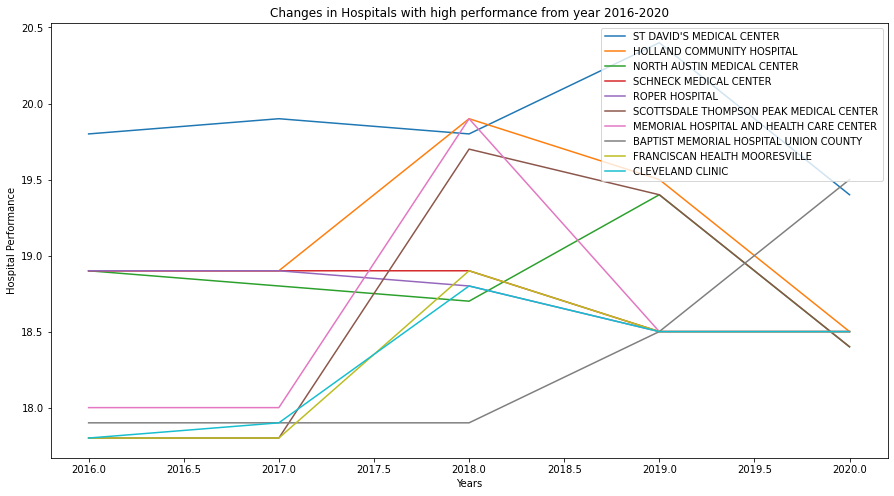

In [31]:
#import library for plotting
import matplotlib.pyplot as plt
#for y-axis
Facility_name = df.columns
#graph size
plt.figure(figsize=(15, 8))
#plot a line plot for the dtop10 data
for y in Facility_name:
  plt.plot(df.index, df[y], label=y)
  plt.legend(loc='upper right')
plt.xlabel('Years')
plt.ylabel('Hospital Performance')
plt.title('Changes in Hospitals with high performance from year 2016-2020') 
plt.show()

The graph above shows that the hospitals generally increased from year 2016-2020, even though it was observed that around year 2017 - 2018, most of the hospitals had a sharp rise in performance, then fell in performance year 2020. Conclusion is that the individual hospitals performance has a slight consistent increase in performance from 2017-2020 

E

CORRELATION

To discover **if the CMS star rating (Hospital overall rating) is correlated with the patients satisfaction(Patient Survey Star rating) and the Patient exprience national comparison**.


 We found the correlation between Hospital overall rating and Patient Experience National Comparison below.

In [50]:
#created a list containing the dataframe of the years
list_years = [ds_2016, ds_2017, ds_2018, ds_2019, ds_2020]
#iterated through the list above to find the correlation between hospital overall rating and patient survey star rating
for year in list_years:
  print(year['Hospital overall rating'].corr(year['Patient Survey Star Rating']))


0.1877955855853514
0.1815584222415325
0.17216082062553276
0.12224144852381617
0.12174406162439687


As seen above there is a low  correlation of  between the Rating and the patient satisfaction scores, this indicates that CMS Star rating is  not correlated with the Patient Satisfaction

In [52]:
#created a list containing the dataframe of the years
list_years = [ds_2016, ds_2017, ds_2018, ds_2019, ds_2020]
#iterated through the list above to find the correlation between hospital overall rating and patient survey star rating
for year in list_years:
  print(year['Hospital overall rating'].corr(year['Patient experience national comparison']))


0.661478573450252
0.6669855950169408
0.6472710505391259
0.6283718270594036
0.6326887386434488


For the Patient experience national comparison, it shows a better correlation around 65% with the Hospital overall rating.